In [1]:
# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [2]:
train  = pd.read_csv("data/train.csv")
test   = pd.read_csv("data/test.csv")
test_y = pd.read_csv("data/gender_submission.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print('''
Field       Description
======================================================
PassengerId id
Survived    survival (0=no, 1=yes)
Pclass      ticket class (1=1st, 2=2nd, 3=3rd)
Name        name
Sex         [male, female]
Age         Age in years (decimal)
SibSp       # of siblings / spouses aboard the Titanic
Parch       # of parents / children aboard the Titanic
Ticket      Ticket number (PC 17599)
Fare        Passenger fare (71.2833)
Cabin       Cabin number (C85)
Embarked    [C=Cherbourg, Q=Queenstown, S=Southampton]
''')


Field       Description
PassengerId id
Survived    survival (0=no, 1=yes)
Pclass      ticket class (1=1st, 2=2nd, 3=3rd)
Name        name
Sex         [male, female]
Age         Age in years (decimal)
SibSp       # of siblings / spouses aboard the Titanic
Parch       # of parents / children aboard the Titanic
Ticket      Ticket number (PC 17599)
Fare        Passenger fare (71.2833)
Cabin       Cabin number (C85)
Embarked    [C=Cherbourg, Q=Queenstown, S=Southampton]



In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
### Now let's prepare lists of numeric and categorical columns

# Numeric Features
numeric_features = ['Age', 'Fare']

# Categorical Features
ordinal_features = ['Pclass', 'SibSp', 'Parch']
nominal_features = ['Sex', 'Embarked']

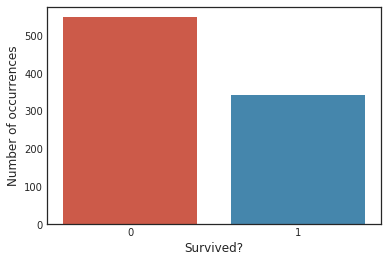

In [7]:
### Target variable exploration
sns.countplot(train.Survived);
plt.xlabel('Survived?');
plt.ylabel('Number of occurrences');
plt.show()

/home/javi/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


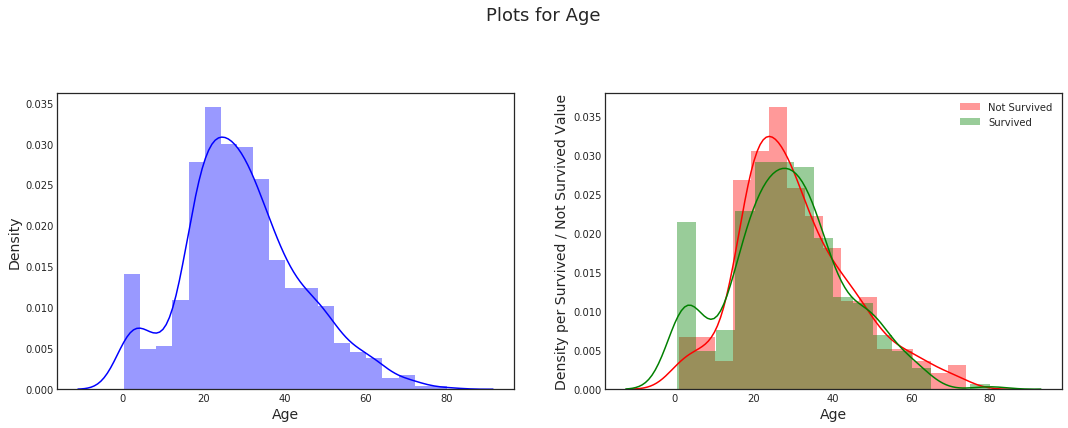

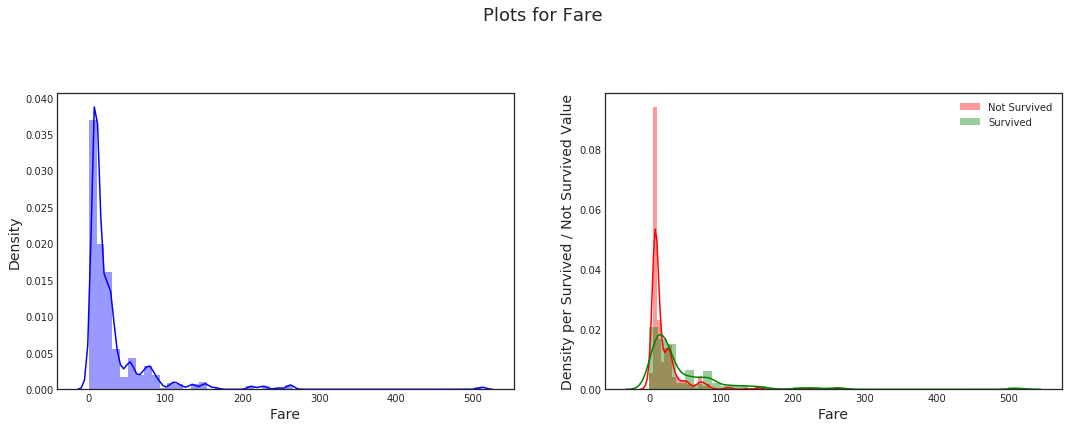

In [8]:
### Plotting Numeric Features
# Looping through and Plotting Numeric features
for column in numeric_features:    
    
    # Figure initiation
    fig = plt.figure(figsize=(18,12))
    
    ### Distribution plot
    sns.distplot(train[column].dropna(), color='blue', ax=plt.subplot(221));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Density', fontsize=14);
    # Adding Super Title (One for a whole figure)
    plt.suptitle('Plots for '+column, fontsize=18);
    



    ### Distribution per Survived / Not Survived Value
    # Not Survived hist
    sns.distplot(train.loc[train.Survived==0, column].dropna(),
                 color='red', label='Not Survived', ax=plt.subplot(222));
    # Survived hist
    sns.distplot(train.loc[train.Survived==1, column].dropna(),
                 color='green', label='Survived', ax=plt.subplot(222));
    # Adding Legend
    plt.legend(loc='best')
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Density per Survived / Not Survived Value', fontsize=14);
    


    # Printing Chart
    plt.show()